# Project: Investigate a Dataset. (No-Show Appointments)

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, a comprehensive data analysis was carried out on a dataset (No-show appointments). The dataset contains information from 100k plus medical appointments in Brazil in 2016, which focused on whether patients show up for their appointment. A few characteristics (variables) about the patients are included in each row. I analyzed the dataset to see if one can predict whether patients will show up for their medical appointments and to also determine what factors or characteristics about patients influences the patients to show up or not show up for their appointments.  

I analyzed 14 different variables, where each variable highlights different behaviour about a patient. The variable of interest is the No-show variable, where ‘No’ means a patient did not show up to an appointment and ‘Yes’ means they did show up. This is also the dependent variable that is dependent upon any of the other independent variables in the dataset would be use to draw any correlation from. 

In [1]:
# importing all necessary libraries, packages and functions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of this report, I loaded the data, printed and inspected the dataset for the data types, missing or duplicate instances, errant data, and null values. I checked for cleanliness to see how to trim and clean the dataset for the analysis, as clear and clean data equates to more accurate results.  



### General Properties

In [2]:
#Loaded the dataset and checked the datatype of each column, how many rows and missing values in each column.
df = pd.read_csv('/home/axe_rhitta/noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
#Viewed dimension of dataset (Row vs Columns). 
df.shape

(110527, 14)

In [4]:
#Checked for the estimate of how many values are in each category. 
df.nunique() 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
#Checked for any missing or null values in dataset. 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#Checked for duplicates in the dataset.
sum(df.duplicated())

0

In [7]:
#Checked the first five rows of the dataset.
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#Summary of the data to inspect the value distributions, min and max of each column for any discrepancy. 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> After the data wrangling process, the dataset is mostly clean. The dataset consists of 14 columns and 110.527 rows with no duplicates or missing values. 
 
<a id='cleaning'></a>
## Data Cleaning

> In this section, I focused on the variables (columns) that are going to be analyzed and dropped the ones that are not needed for the analysis. The data type of some columns would be converted to the appropriate format for more precise value definition and easier handling, and some of the column's names that are consistent with underscores in place of spaces and spelled wrongly would be corrected. The min and max value of the Age column seems odd and would be looked at. The age of -1 is not a valid age, so I will drop any row with this age.  

In [9]:
#Checked to confirm if there are patients where Age = 115. 
df.loc[df['Age'] == 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [10]:
#Checked for patient where the Age is -1.
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
#Dropped the patient row where Age = -1.
df.drop(df.index[99832], inplace=True)


In [12]:
#Checked to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [13]:
#Renamed the columns so that each column has same format and corrected any wrong spellings.
df.rename(columns={'PatientId':'Patient_id', 'AppointmentID':'Appointment_id','ScheduledDay':'Scheduled_day',
                   'AppointmentDay':'Appointment_day', 'Neighbourhood':'Neighborhood', 'Hipertension':'Hypertension',
                   'Handcap':'Handicap','No-show':'No_show'},
inplace=True)
# confirm changes
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
#Scheduled and Appointment Day columns were cleaned and datatypes were converted to datetime. 
df.Scheduled_day = pd.to_datetime(df['Scheduled_day'], format='%Y-%m-%dT%H:%M:%SZ')
df.Appointment_day = pd.to_datetime(df['Appointment_day'], format='%Y-%m-%dT%H:%M:%SZ')

In [15]:
#Converting the Gender column to category datatype
df.Gender = df.Gender.astype('category')

In [16]:
#Converting the observations in No_show column from No/Yes to 1/0.
df.No_show.replace(['No', 'Yes'], [0, 1], inplace=True)
df.head(1)

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [17]:
#Dropped columns not needed
df.drop(['Patient_id', 'Appointment_id'], axis=1, inplace=True)
df.head()

,Gender,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [18]:
#Checked to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Gender           110526 non-null  category      
 1   Scheduled_day    110526 non-null  datetime64[ns]
 2   Appointment_day  110526 non-null  datetime64[ns]
 3   Age              110526 non-null  int64         
 4   Neighborhood     110526 non-null  object        
 5   Scholarship      110526 non-null  int64         
 6   Hypertension     110526 non-null  int64         
 7   Diabetes         110526 non-null  int64         
 8   Alcoholism       110526 non-null  int64         
 9   Handicap         110526 non-null  int64         
 10  SMS_received     110526 non-null  int64         
 11  No_show          110526 non-null  int64         
dtypes: category(1), datetime64[ns](2), int64(8), object(1)
memory usage: 10.2+ MB


In [19]:
df.to_csv('NSA-cleaned.csv', index = False)

> After the cleaning and the transformation process, the data now consists of 12 columns and 110526 rows. 

<a id='eda'></a>
## Exploratory Data Analysis

> In the section, the exploration of the data was done after the data has been trimmed and cleaned. I computed statistics and created visualizations to address the research questions posed with this dataset in this section. The variables were looked at one by one and relationship between them was looked at and evaluated. 

In [20]:
#Loading the cleaned dataset. 
dfc = pd.read_csv('NSA-cleaned.csv')

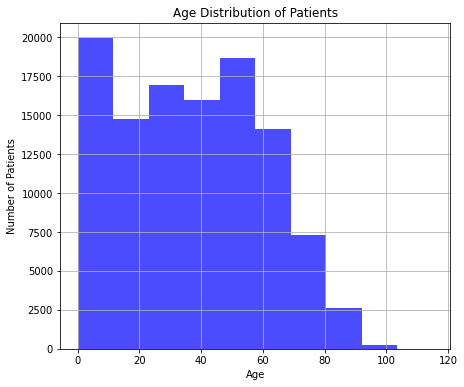

In [21]:
#Histogram for age distribution
dfc['Age'].hist(figsize=(7,6), color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Patients');

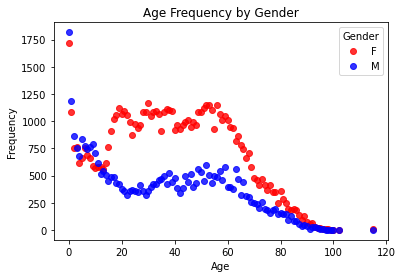

In [22]:
#Age Frequency graph.
pd.crosstab(dfc.Age, dfc.Gender).plot(style=['or','ob'], alpha=0.8);
plt.title('Age Frequency by Gender')
plt.ylabel('Frequency');

> From the age histogram and frequency graph, there are basically three age groups with higher frequency than others: With the 1: Very young patients; 2: 30-35 years 3: 44-45 years. The second group seem to be formed due to a high frequency of females, whereas the third peak has contribution of both male and female, given their proportions in the dataset.

### Research Question 1: Are there more no-shows with alcoholism or vice versa?

In [23]:
#Checked for how many patients that showed up for appointments in relation with alcoholism. 
dfc.groupby(["No_show", "Alcoholism"]).size()

No_show  Alcoholism
0        0             85524
         1              2683
1        0             21642
         1               677
dtype: int64

> **Discussion**: Almost all of the patients were free of alcoholism; only 2.7 percent were alcoholics, while the remaining 0.9 percent were not. There were 2683 patients diagnosed with alcoholism who did not show up for their visits, compared to 677 who did. Patients suffering from alcoholism are less likely to attend appointments. The number of no-shows rises when alcoholism is prevalent.

### Research Question 2 : Does a scholarship influence the patient to show up for appointment?

In [24]:
#Checked for how many patients showed up for appointments and how many did not. 
print(dfc.No_show.value_counts())
print('\n')

#Checked for how many patients scholarship count. 
print(dfc.Scholarship.value_counts())
print('\n')

#Checked for how many of the no-shows had scholarships and how many that showed up did have scholarships.
#The provides an estimate of whether scholarships influence patients to show up to appointments
print(dfc.groupby(["No_show", "Scholarship"]).size())

0    88207
1    22319
Name: No_show, dtype: int64


0    99665
1    10861
Name: Scholarship, dtype: int64


No_show  Scholarship
0        0              79924
         1               8283
1        0              19741
         1               2578
dtype: int64


> **Discussion**: The outputs from the above code indicated there were approximately 9/11 persons who showed up for appointments and 2/11 people who did not. In the scholarship count, approximately 10/11 persons had no scholarships and 1/11 people had scholarships. As a result, half of the two people who did not show up for appointments had scholarships. This did not give any decent idea of whether having a scholarship would influence patients' attendance at appointments. Using the "groupby" function, I discovered that of the 10861 patients did have a scholarship, 8283 did not show up for an appointment, whereas 2578 did. Possessing a scholarship does not influence patients to show up for appointments.


### Research Question 3: Does the option to receive SMS text messages influence the patient to show up for appointments?

In [25]:
#Checked how many patients that showed up for appointments or not had text message notifications.
dfc.groupby(["No_show", "SMS_received"]).size()

No_show  SMS_received
0        0               62509
         1               25698
1        0               12535
         1                9784
dtype: int64

> **Discussion**: Approximately 3.5/11 patients received SMS messages regarding their appointments, whereas the remaining 7.5 patients did not. 25698 patients did not show up for their appointments out of the 35482 who received SMS messages, while 9784 patients did show up for their appointments. SMS Text messages did not influence patients to show up for their appointments.

### Research Question 4:  What are relationships between the three variables investigated above?

To compare and analyze the relationship bewteen the three variables, gthe roupby function and bar charts would be used to compare two variables at a time. There will be 3 groupby functions and bar graphs presented for each relationship explored- scholarship and SMS_received, alcoholism and SMS_received, and alcoholism and scholarships.

Scholarship  SMS_received
0            0               67688
             1               31977
1            0                7356
             1                3505
dtype: int64




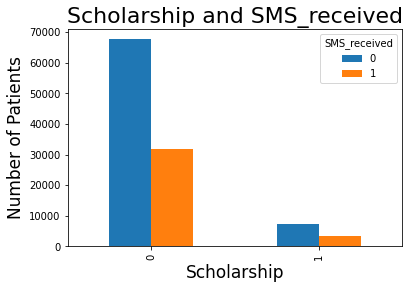

Alcoholism  SMS_received
0           0               72531
            1               34635
1           0                2513
            1                 847
dtype: int64




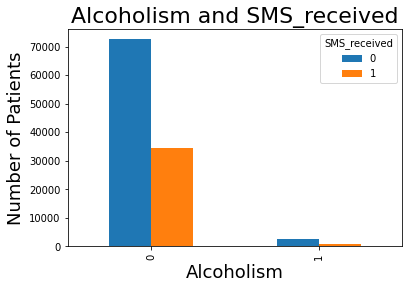

Scholarship  Alcoholism
0            0             96833
             1              2832
1            0             10333
             1               528
dtype: int64




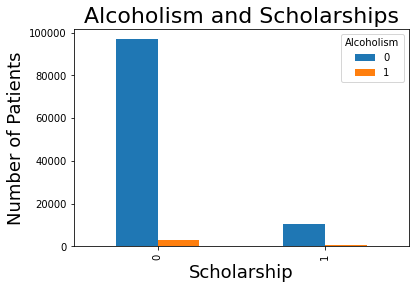

In [26]:
#Scholarship and SMS_Received
#Using the groupby to get an estimate of what the graph should look like
print(dfc.groupby(["Scholarship", "SMS_received"]).size())
print('\n')

#Plotting a bar graph based on groupby data.
groups = dfc.groupby(['Scholarship','SMS_received']).size().unstack(fill_value=0)
groups.plot.bar()

#Setting titles and axes.
plt.title('Scholarship and SMS_received', fontsize = 22)
plt.xlabel('Scholarship', fontsize=17)
plt.ylabel('Number of Patients', fontsize=17)

#Showing the graph.
plt.show()


#Alcoholism and SMS_Received.
print(dfc.groupby(["Alcoholism", "SMS_received"]).size())
print('\n')

#Plotting the bar graph based on groupby data.
groups = dfc.groupby(['Alcoholism','SMS_received']).size().unstack(fill_value=0)
groups.plot.bar()

#Setting titles and axes.
plt.title('Alcoholism and SMS_received', fontsize = 22)
plt.xlabel('Alcoholism', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

#Showing the graph. 
plt.show()


#Alcoholism and Scholarship
print(dfc.groupby(["Scholarship", "Alcoholism"]).size())
print('\n')

#Plotting the bar graph based on groupby data
groups = dfc.groupby(['Scholarship','Alcoholism']).size().unstack(fill_value=0)
groups.plot.bar()

#Setting titles and axes
plt.title('Alcoholism and Scholarships', fontsize = 22)
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

#Showing the graph.
plt.show()



> **Findings**: There is a direct relationship link the **scholarships and SMS received**. As the number of scholarships increases, so did the number of SMS messages received. This relationship can be discovered by dividing the number of patients who receive text messages and scholarships by the number of patients who did not receive text messages and did receive scholarships - 3505/7356 = 0.476 - and comparing it to the number of patients who did receive text messages and did not receive scholarships - 31977/67689 = 0.472.


> There is also a direct relationship between **alcoholism and SMS_received**. As alcoholism increased, text messages received increased. This relationship can be found by dividing the amount of patients who receive text messages and has alcoholism by those that did not receive text messages and has alcoholism - 847/2513 = 0.337 - and by comparing it to dividing those that did receive text messages and do not have alcoholism by those that did not receive text messages or have alcoholism - 34635/72532 = 0.478. 

> There is no direct relationship between **alcoholism and scholarships**. As alcoholism increased, scholarships decreased. This relationship can be found by dividing the amount of patients who has alcoholism and scholarhips by those that did not have alcoholism and but has scholarships - 528/1033 = 0.051 - and by comparing it to dividing those that do have alcoholism and do not have scholarships by those that do not have alcoholism or scholarships - 2832/96834= 0.029. Alcholism increased from 0 to 1, the proportion that received scholarships to those that didnt decreased from 0.051 to 0.029.

### Research Question 5:  Does a certain gender influence appointments show up or not?

No_show  Gender
0        F         57245
         M         30962
1        F         14594
         M          7725
dtype: int64




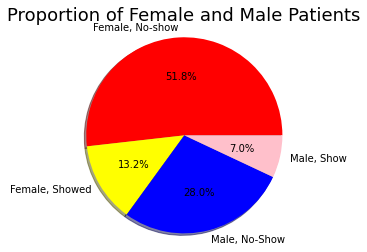

In [27]:
#Creating a pie chart to determine which category influences patients to show up.
print(dfc.groupby(['No_show','Gender']).size())
print('\n')

#Setting pie chart properties. 
labels = 'Female, No-show', 'Female, Showed', 'Male, No-Show', 'Male, Show'
cut_points = [57245, 14594, 30962, 7725 ]
colors = ['red', 'yellow', 'blue', 'pink']

#Setting piechart title and axis.
fig1, ax = plt.subplots()
ax.pie(cut_points, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Proportion of Female and Male Patients', fontsize= 18)

#Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

#plot piechart
plt.show()

<a id='conclusions'></a>
## Conclusions

**Conclusion**: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? To answer this question, I looked at three variables - scholarships, alcoholism, and SMS_received. I determined that scholarships and SMS_received did not influence patients showing up for their appointment. Alcholism did influence patients showing up for their appointment. I deduced that factors connected to a patient's health, rather than their wealth or knowledge, influence whether or not they show up for appointments. Alcoholism interferes with a person's activities of daily living by requiring larger and larger doses of alcohol to achieve the same impact, according to study. This may cause a person to miss meetings or work days, as well as catch up with friends. It should come as no surprise that alcoholism makes it harder for patients to keep their appointments.

> I studied the correlations between variables. I discovered an indirect link between alcoholism and scholarships received, as well as a direct link between text messages received and alcoholism and a direct link between text messages received and scholarships received. Although correlation does not imply causation, as I was only interested in the direct or indirect relationship between variables. Alcoholism and earning scholarships have a strong indirect association. A long-term case of alcoholism will impact one's academic performance and, as a result, one's ability to acquire a scholarship.

> Also, I looked at the gender with no show for their appointments. Only around a fifth of the female population showed up for their appointments, while only about a quarter of the male population did. Furthermore, there were more female patients than male patients, putting the female population at a disadvantage when it came to keeping their appointments. 

> **Limitation** : Limitation of this anlaysis stems from the dataset. The values of the variables (appointment_id, patient_id or scheduled_day) columns in the dataset were not of much use. Most rows for the columns had unique value for each row or were either the same. There was no way to determine the level of income of the patients which could have been a proper guage in determining whether or not a patient shows up to their appointment. 

In conclusion, patients in showing up for appointments was influenced by alcoholism, gender, and age group. Alcoholism hindered patients in showing up for appointments. Females tended to not show up for appointments more than males. Children and adults in their 50s and 60s did not show up to their appointments the most. Limitations of the data set is that not all variables were useful and thus, not all variables were used. More information on Brazil, such as Brazil's neighbourhood by income levels, could have aided in determining more informative columns.




